# Exploratory Data Analysis

In this notebook we'll have a look at conducting some simple EDA on the Diabetes dataset from the sklearn package.

**Objectives**
- Recall the basics of EDA - what it is and why we do it
- Explain the concepts of univariate and multivariate analysis
- Practice steps to conduct simple EDA on a dataset
- Compare and contrast the EDA tools/methods used

## Contents

1. Basic EDA
2. Univariate analysis
3. Multivariate analysis
4. Looking into patterns of interest
5. Exercise questions


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = pd.DataFrame(load_diabetes(scaled = False)["data"],columns=load_diabetes(scaled = False)["feature_names"])
diabetes["target"] = load_diabetes(scaled = False)["target"]

**What's in our dataset?**

The diabetes dataset is made up of ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

- Age
- Sex *(NOTE: Sex is labelled as 1.0 and 2.0. There is no clear indication in documentation of which value refers to which sex. For the purposes of this notebook, 1.0 = Female and 2.0 = Male)*
- BMI
- Average blood pressure (bp)
- Blood serum measurements (s1-s6)
- Disease progression 1 year after baseline (**target**)

Predicting disease progression can enhance how we treat diabetic patients and can help us give them realistic timelines or outlooks. If we can accurately predict what features lead to faster disease progression at a one year mark, we can potentially help patients prepare or take action to mitigate the effects.

In [23]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


---

## 1. Basic EDA
Let's do some basic EDA to get an idea of what we're working with

In [18]:
# understand what the data looks like
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [20]:
diabetes.shape

(442, 11)

From our first two checks, we can see that all our data is in the datatype of floats, and all of our columns have 442 values. We can also see all of the columns that we are working with.

Even though we can see that all our columns have 442 values, it's still wise to do a sense check for any missing values:

In [22]:
# check for any nulls
diabetes.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Now luckily here, we don't have any missing values. But what if we did?

### What to do with missing observations?
Start by understanding them, and the environment they come from. For example, if we are looking at stock prices, and trying to predict future prices but values are missing for companies that went under... we would want to think very carefully about how to handle that. We need to judge when it is and is not appropriate to remove these rows/features and when to impute them with data.

So, what are our options in missing data? 

- Leave as is (allow algorithm to treat differently)
- Drop rows? (are >60% of the features missing in this row?)
- Drop feature? (are >60% of the values missing in this column?)
- Set as 0?
- Set as mean/median/mode?
- Use imputation library - essentially "predict" the likely value


**How do we actually do this though?**

Pandas has two extremely useful methods for this - `df.dropna()` and `df.fillna(<value>)`. We can use `.dropna()` to drop all null values in a dataframe (either by row or column), and `.fillna(<value>)` to fill all null values. Within the `.fillna(<value>)` method, we can specify what we want to fill the null values with - this can be a explicit value or we can use code to calculate a value to be used, e.g. 

- `df.fillna(0)` would fill nulls with a 0
- `df.fillna(df.median())` would fill nulls with the median of the dataset

We can also specify a column to drop or replace nulls in - `df['column'].dropna()` or `df['column'].fillna(<value>)`

---

## 2. Univariate analysis 
Looking for the distributions, and extreme values of the data

Now that we've had a basic look at our data, let's move onto some univariate EDA.

Starting with univariate analysis makes it easier for us to begin understanding what we have in our dataset before we start investigating relationships.

- histograms
- boxplots
- bar charts
- pie charts

These types of visuals are all capable of showing distributions (or proportions, in the case of categorical variables) and features of an **individual** variable. 

In [21]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


Here we get a nice summarised overview of our dataset. Again we can see that each of our columns has 442 values, but now we can start to see the differences in ranges of our columns. Our age ranges from 19 - 79, while BMI ranges from 18 - 42.2. This is pretty expected, and helps us to see that our data is making sense so far. 


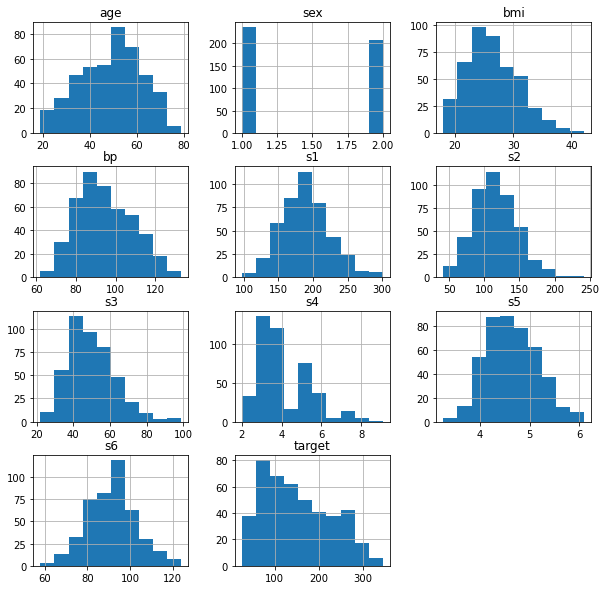

In [31]:
# data dsitributions - does anything look weird?
diabetes.hist(figsize = (10,10));

Our histograms show overall pretty average data. Some of our features do seem to be slightly skewed, which may be something we come back to reevaluate once we've created an initial model. There is one value in particular that sticks out from this visual - the 'sex' feature. Of course, it is logged as 1 or 2 to indicate female or male, so it is technically a categorical feature. Now we've picked this up, we could go back and do some feature engineering or cleaning to ensure our dataset reflects Female or Male rather than 1 or 2 to make visualisations easier.

**Let's try visualise the distributions in a slightly different way:**

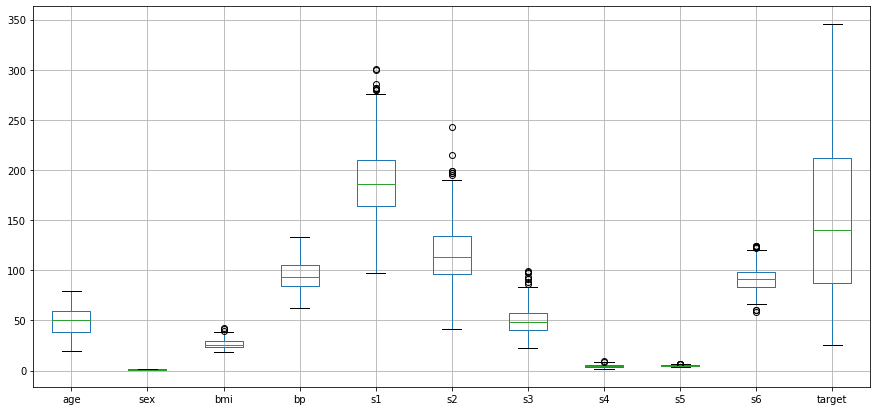

In [36]:
# Let's visualise as a boxplot!
diabetes.boxplot(figsize = (15,7));

#### Is this a useful visual? Why/why not? What's wrong with it?

While it's great to see our distributions like this - boxplots can help indicate where outliers in our data may be and help us to very clearly see that our data sits in different ranges - some of our features are not very well-represented in the above visual. This is because their range is much smaller than other features in our data.

Let's have a look at some of our features on individual box plots to remedy the above boxplot that wasn't too useful:

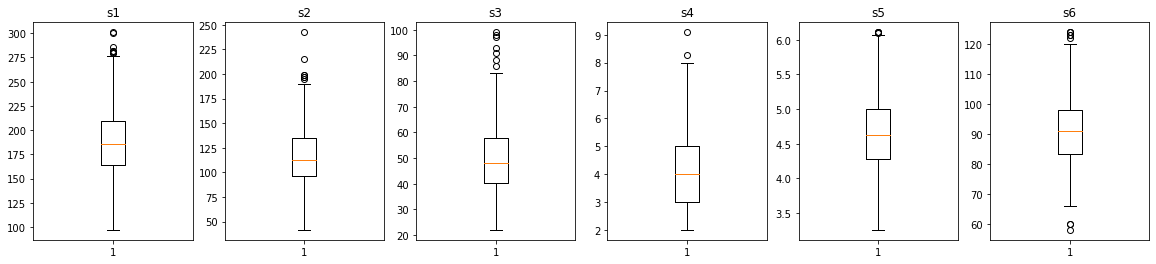

In [58]:
# making subplots
fig, ax = plt.subplots(1, 6, figsize=(20, 4))
 
# set data with subplots and plot
ax[0].boxplot(diabetes['s1'])
ax[1].boxplot(diabetes['s2'])
ax[2].boxplot(diabetes['s3'])
ax[3].boxplot(diabetes['s4'])
ax[4].boxplot(diabetes['s5'])
ax[5].boxplot(diabetes['s6'])
 
# set the title to subplots
ax[0].title.set_text("s1")
ax[1].title.set_text("s2")
ax[2].title.set_text("s3")
ax[3].title.set_text("s4")
ax[4].title.set_text("s5")
ax[5].title.set_text("s6")

# set spacing
plt.show()

This looks a lot better - we can actually see each feature is on its own axis and we can visualise the box plots more clearly.

`Try plotting boxplots for age, sex, BMI, bp and target like the above!`

#### What about outliers? They look like they could be an issue - what do we do?

Much like the case of missing values, dealing with outliers is not always a cut and dry situation. You have to think about where these outliers come from (are they natural deviations? Could they be from data entry errors?) decide whether or not to keep your outliers (and why), and then decide a threshold for what is considered an 'outlier'.


![](https://www.scribbr.com/wp-content/uploads/2022/01/interquartile-range.png)

**A few methods of outlier detection - points that lie outside of one of these ranges:**
- -1.5 * IQR to 1.5 * IQR
- 5th to 95th percentile
- -3 standard deviations to +3 standard deviations from the mean


**But how do we deal with them?**

Again, much like our missing values, we can either remove entirely or impute (in this case, replace) our outliers

---

Now, there's one feature in our dataset that isn't very well represented in the visuals so far. Remember - EDA isn't just to tick off a box. We need to actually explore our data and use methods that are appropriate for our data so that we can draw as much *relevant* insight from our data as possible.

In [59]:
# There's a feature in our dataset that isn't very well represented in the visuals so far
diabetes['sex'].value_counts()

1.0    235
2.0    207
Name: sex, dtype: int64

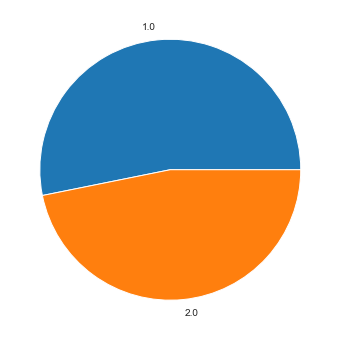

In [113]:
# We can plot a pie chart to get a better visualisation of the proportions
plt.figure(figsize=(10, 6))
plt.pie(diabetes['sex'].value_counts(), labels = diabetes['sex'].value_counts().index)
plt.show() 

Great! Now we can see proportions a bit better. But, our labels of 1.0 and 2.0 aren't very informative...

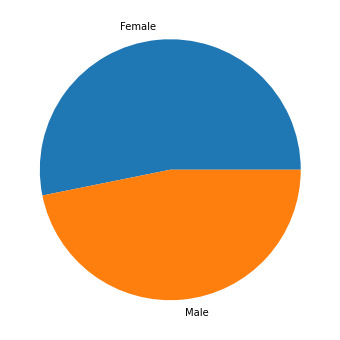

In [64]:
plt.figure(figsize=(10, 6))
plt.pie(diabetes['sex'].value_counts(), labels = ['Female', 'Male'])
plt.show() 

Now we've got some labels to make our visual more understandable. What we can see here is that there are more females than males in our dataset. That being said, it is still somewhat an even split, we have a pretty good representation of both genders. How could we take this any further, especially in our multivariate analysis?

## What about our target variable?

If we have a target variable, something that is an important metric to us or something that we are eventually going to build a model to predict, it is well worth our while to explore this variable in isolation and with other features as well to understand what we're working with. 

Having an understanding of this variable, as well as how this feature relates to the others in our dataset can help inform our modelling phase. If we can see that our target feature is very highly correlated with one other feature in our dataset, we may decide that that is the only feature to use in our model. Alternatively, if we see very little interaction between our target feature and other features, we may decide that they lack the importance to be included in our model (but, more on this in the Feature Selection topics. Back to the visuals!)

In [82]:
diabetes['target'].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

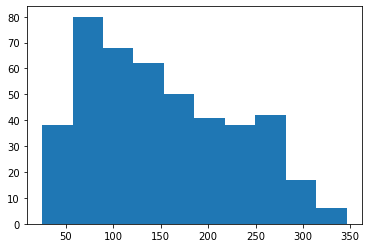

In [68]:
# Let's have a closer look at our target distribution
plt.hist(diabetes['target'])
plt.show()

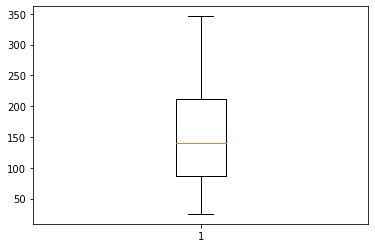

In [67]:
# We can recognise if our predictions are making sense, or if they're falling out of the range entirely we know our model is not doing well
plt.boxplot(diabetes['target'])
plt.show()

Examining our target variable is important not only to allow us to better understand what it is we're predicting, but it can help us start thinking about which of our features may actually have some relation to our target.

Understanding the range and distribution of our target can also help when we're making predictions - do our predictions follow the same distribution? What range are they falling within and does it make sense? If our target variable is skewed, what are the potential issues of this distribution?

---

## 3. Multivariate analysis 
Looking for patterns between the variables

Now that we've looked at our variables individually, let's have a look at how they're interacting! Multivariate analysis allows us to examine patterns and trends between the features in our dataset, to start uncovering some relationships that we may not have immediately seen or thought of. From this kind of analysis, we can start asking questions/testing hypotheses about our features and digging deeper into those relationships.

Let's start off with a correlation - a look at any potential linear relationships in our data:

In [69]:
diabetes.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


With the `.corr()` method we can even single out our target variable if we are only interested in viewing the correlations with our target:

In [70]:
diabetes.corr()['target']

age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
target    1.000000
Name: target, dtype: float64

There is a lot of information in these results. Though, they can be a bit difficult to read at times and it's not immediately obvious where the strong and weak correlations lie...is there an easier way to visualise these?

Yes! Using a heatmap from the `seaborn` package, we can add colour into our visualisations for an easy view of the strong and weak correlations:

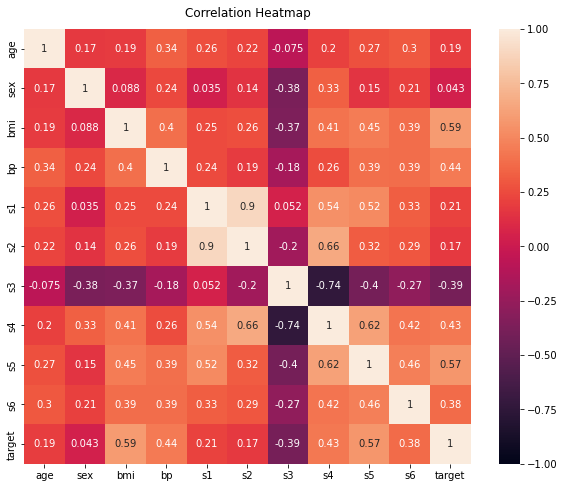

In [73]:
fig = plt.figure(figsize=(10,8))
heatmap = sns.heatmap(diabetes.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We can create even larger visuals that can show us everything at once...but they're not always the best:

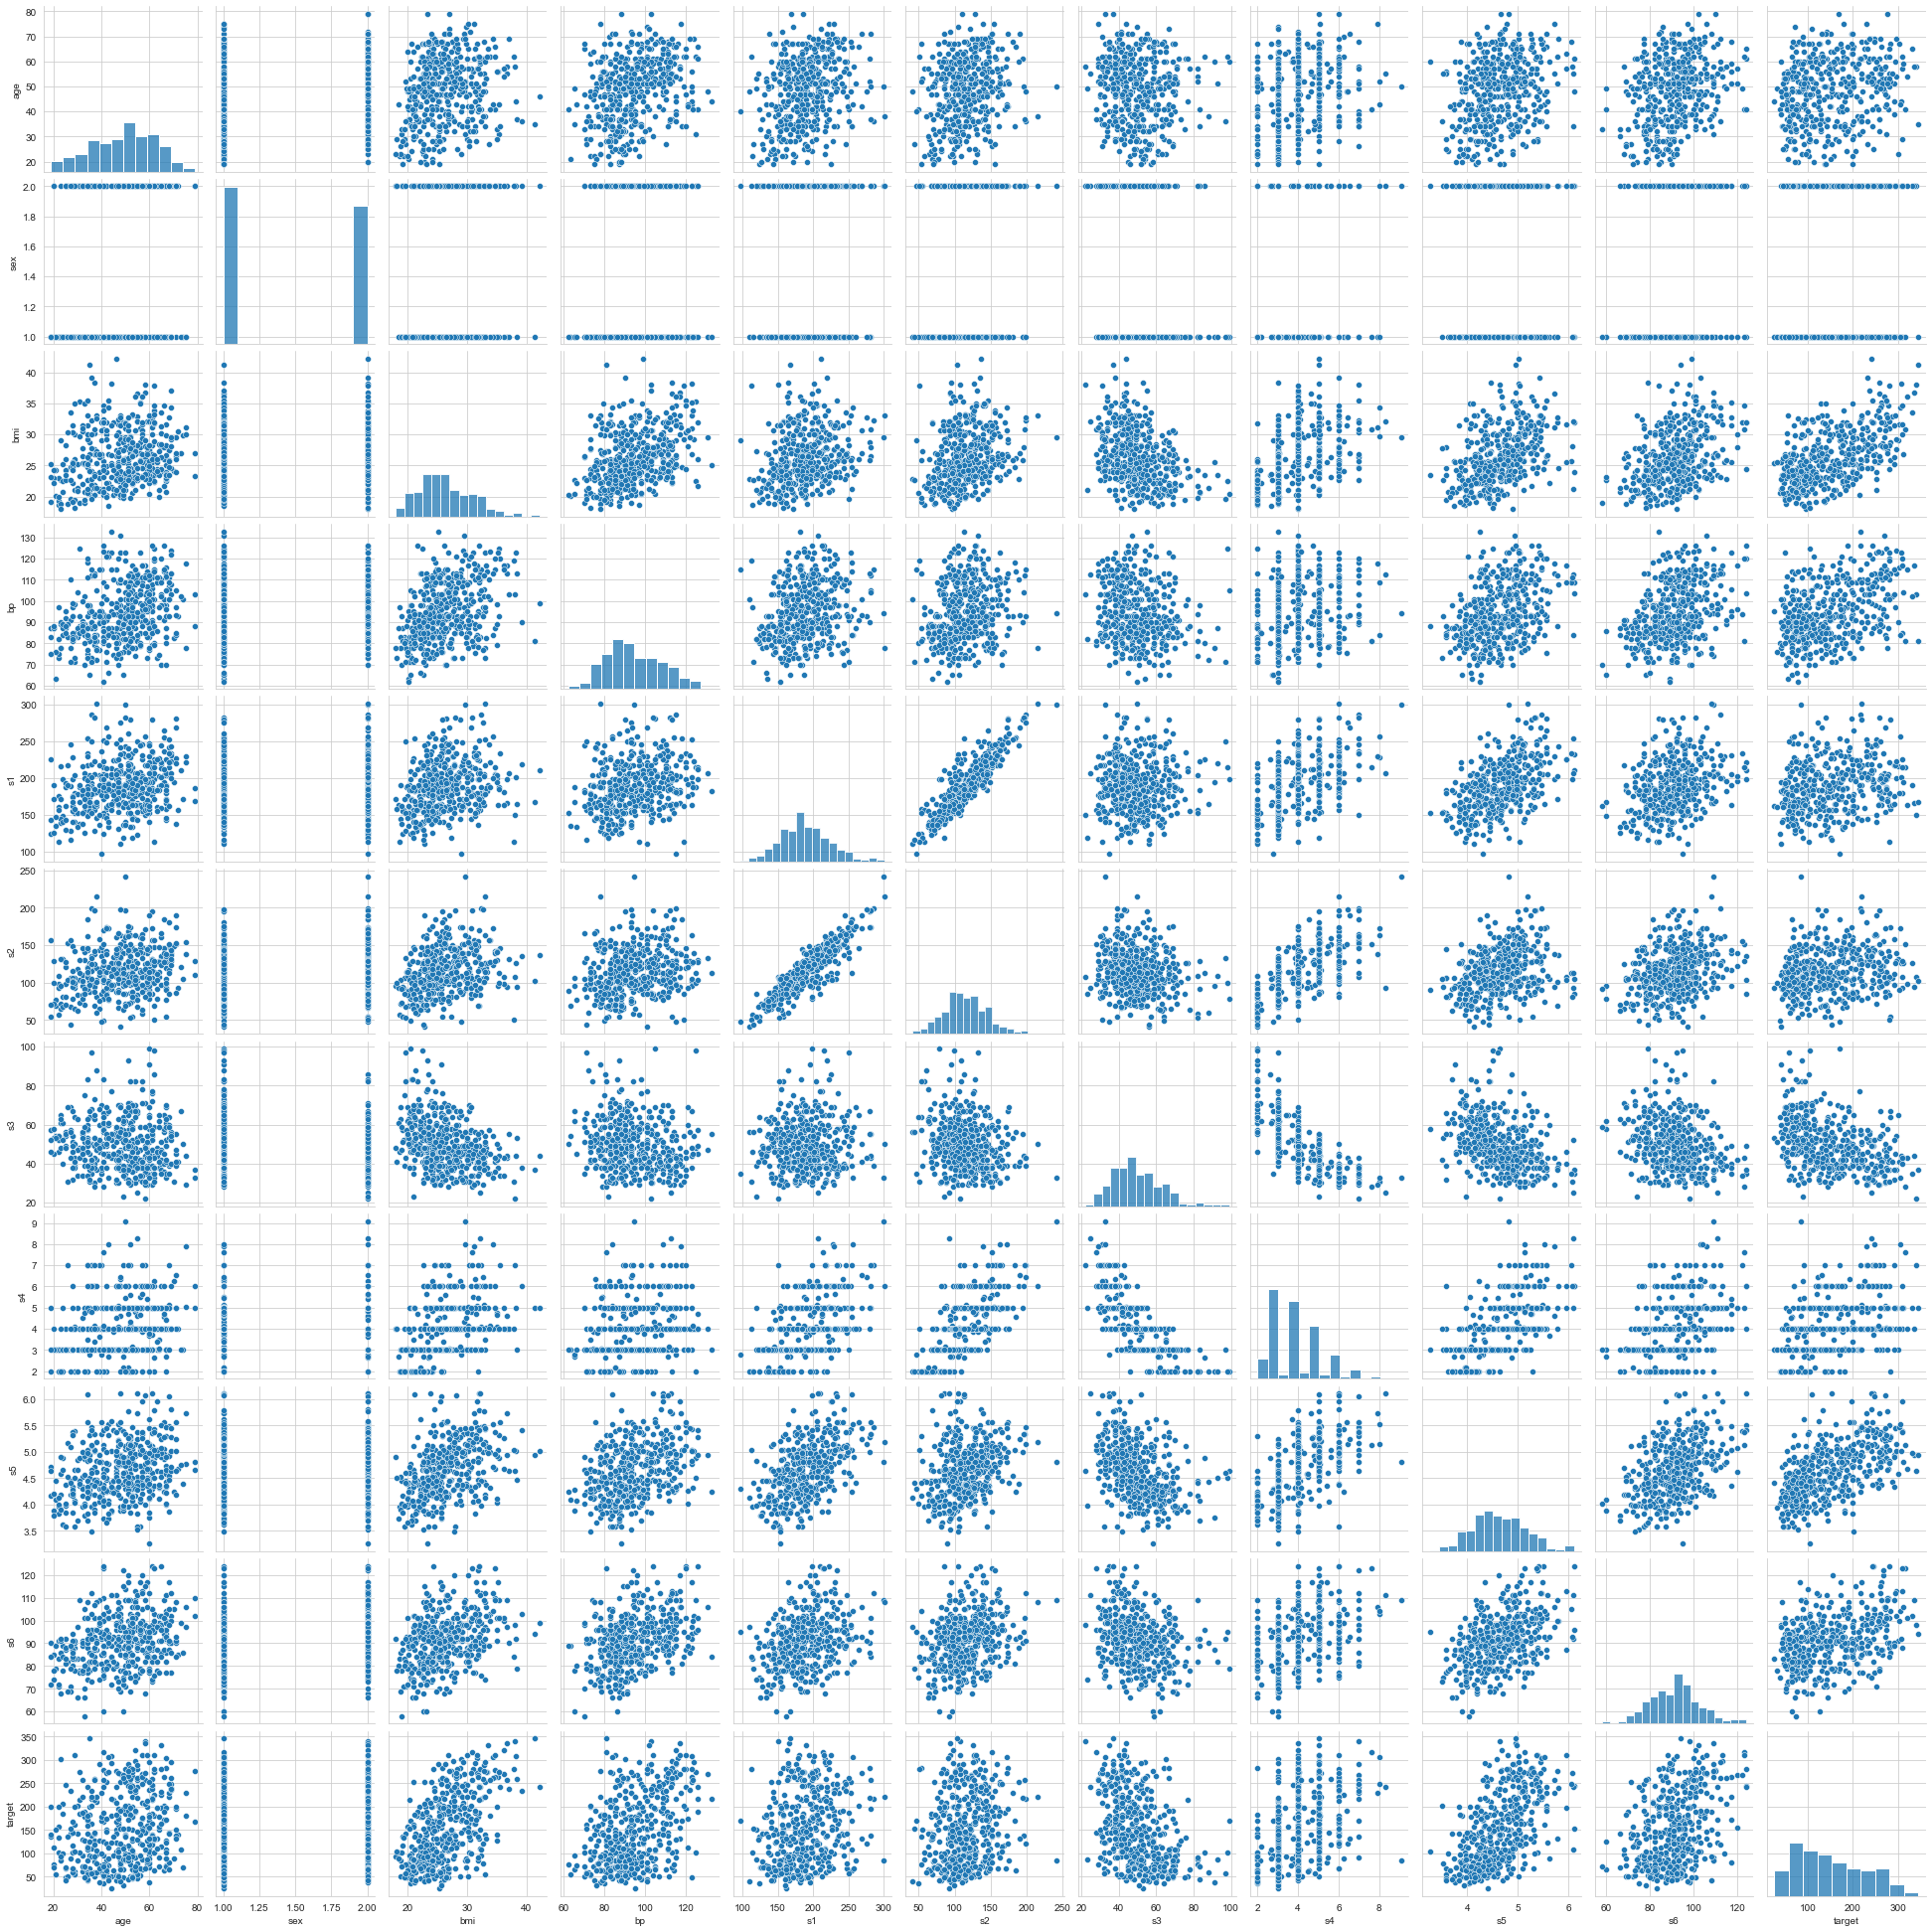

In [104]:
sns.pairplot(diabetes)
#sns.pairplot(diabetes, x_vars = ['target'], y_vars = diabetes.columns);
plt.show();

This visual is pretty crowded, and isn't showing us much. We can see a few somewhat linear relationships between our variables, which align with the correlation heatmap we had before. This visual isn't particularly great for our 'sex' feature, and our 's4' feature seems like it could be recorded in some sort of intervals as well (perhaps something to go back to our univariate analysis and check out?)

Something we could look for in a visual like this is for the presence of any clear relationships that may not be linear. Correlations only look for linear relationships, but what if there are any non-linear relationships in our data? The pairplot would help you to potentially identify causes for further investigation (it would be wise to pull out those individual scatterplots, rather than leave it as just the pairplot when you have so many variables!)

A visual like this can be useful for datasets with fewer features, or if you choose to extract a few features from the dataset and visualise with a pairplot, but with all the features together it is a very difficult visualisation to read. It is important to keep in mind what will provide you with relevant information, and in a way that is adding value to your process. 

For example, we could further investigate any interesting relationships we see in the pairplot, through extracting just the scatterplot for those variables. Let's have a look at the relationship between BMI and our target:

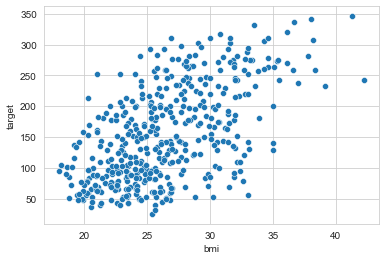

In [105]:
sns.scatterplot(x='bmi',y='target', data=diabetes);

There does seem to be some upward trend between the two variables. We can also add in a third variable into our scatterplots via the hue of our datapoints. Let's see if sex has any bearing on the relationship between BMI and target:

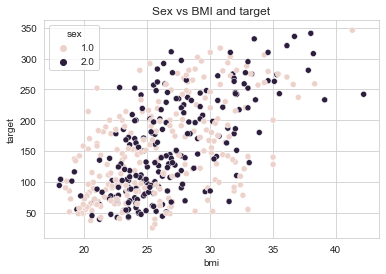

In [106]:
sns.scatterplot(data=diabetes, x="bmi", y="target", hue="sex", alpha=1)
plt.title("Sex vs BMI and target")
plt.show()

There doesn't appear to be any clear trend between the sexes. At a lower target value, it appears the sex 1.0 (female) is more clustered around slightly lower BMI values than the sex 2.0 (male). However, as we get to higher target values, the sexes seem more evenly mixed.

## 4. Looking into patterns of interest
So now that we've explored our features and our target variable, what kind of questions are we asking about our data? 

#### Where do we want to investigate some relationships? We need to drill down into some of the relationships

High BMI is known to be associated with Type 2 diabetes. Let's see if there are any relevant relationships in the portion of our data that has a BMI of over 30 (classed as 'Obese').

In [107]:
diabetes['bmi'].describe()

count    442.000000
mean      26.375792
std        4.418122
min       18.000000
25%       23.200000
50%       25.700000
75%       29.275000
max       42.200000
Name: bmi, dtype: float64

In [108]:
diabetes_bmi_obese = diabetes[diabetes['bmi']>30]
diabetes_bmi_obese

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
8,60.0,2.0,32.1,83.00,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
16,47.0,1.0,30.3,109.00,207.0,100.2,70.0,3.00,5.2149,98.0,166.0
23,61.0,2.0,32.0,103.67,210.0,85.2,35.0,6.00,6.1070,124.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...
416,41.0,1.0,33.8,123.33,187.0,127.0,45.0,4.16,4.3175,100.0,257.0
417,34.0,1.0,33.0,73.00,178.0,114.6,51.0,3.49,4.1271,92.0,55.0
422,27.0,2.0,33.6,110.00,246.0,156.6,57.0,4.00,5.0876,89.0,233.0
428,62.0,2.0,34.6,120.00,215.0,129.2,43.0,5.00,5.3660,123.0,310.0


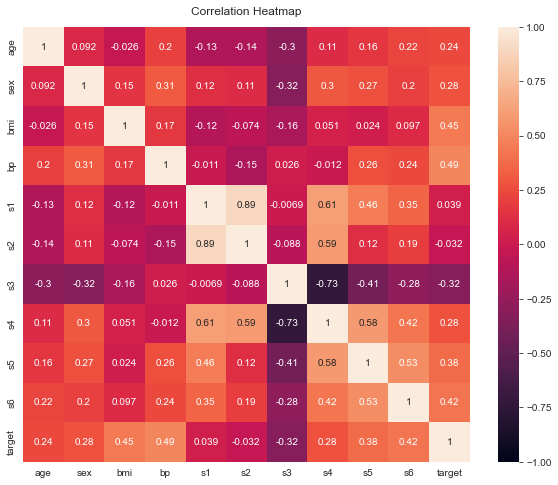

In [109]:
fig = plt.figure(figsize=(10,8))
heatmap = sns.heatmap(diabetes_bmi_obese.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Doesn't seem particularly different to our previous heatmap. Of course, one could dive deeper into these relationships and look at the significance of each correlation to the target feature as well.

Let's try asking something else of our data. Perhaps those over a certain age have a stronger correlation between BMI and the target feature?

Let's make a hypothesis of this:

- H1: Individuals over the age of 60 will have a stronger correlation between BMI and the target variable than the entire group
- H0: Individuals over the age of 60 will **not** have a stronger correlation between BMI and the target variable than the entire group

In [110]:
diabetes['age'].describe()

count    442.000000
mean      48.518100
std       13.109028
min       19.000000
25%       38.250000
50%       50.000000
75%       59.000000
max       79.000000
Name: age, dtype: float64

In [111]:
diabetes_over60 = diabetes[diabetes['age']>60]
diabetes_over60

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
7,66.0,2.0,26.2,114.00,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
14,61.0,1.0,24.0,91.00,202.0,115.4,72.0,3.00,4.2905,73.0,118.0
17,68.0,2.0,27.5,111.00,214.0,147.0,39.0,5.00,4.9416,91.0,144.0
23,61.0,2.0,32.0,103.67,210.0,85.2,35.0,6.00,6.1070,124.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...
408,66.0,1.0,21.7,126.00,212.0,127.8,45.0,4.71,5.2781,101.0,189.0
412,69.0,1.0,34.3,113.00,200.0,123.8,54.0,4.00,4.7095,112.0,261.0
414,71.0,2.0,27.0,93.33,269.0,190.2,41.0,6.56,5.2417,93.0,131.0
428,62.0,2.0,34.6,120.00,215.0,129.2,43.0,5.00,5.3660,123.0,310.0


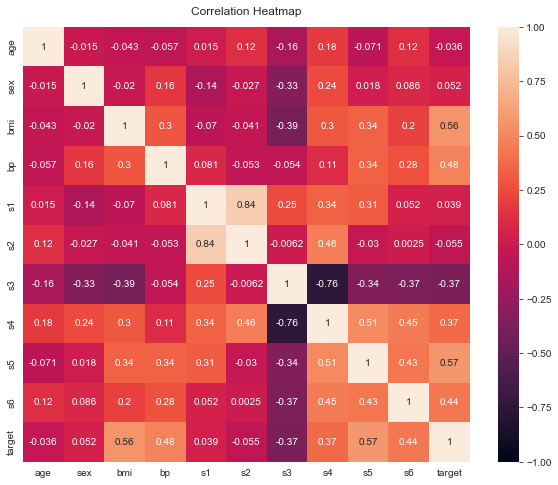

In [112]:
fig = plt.figure(figsize=(10,8))
heatmap = sns.heatmap(diabetes_over60.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Once again, there is not much change from our original heatmap. In this case, we can accept our basic null hypothesis.

EDA could go on and on and on...there are many many things one could explore from a simple dataset. It's important to ensure you're thinking about **what** your visuals are showing you and **why** you are taking the steps you are. It is good practice to write down your interpretations and what insights you are gaining from visuals when you plot them. For anyone who reads your report, this helps to understand your thought process and the justification of why you have conducted the EDA in the way you have.

```
Try think of some more things one could investigate:

- Splitting up BMI categories?
- Age in relation to BMI and target?
```

---

## 5. Exercise questions

1. A histogram is used for multivariate analysis

- True/False?

2. Which of these can be useful for displaying information about an individual *categorical* variable?

- Correlation plot
- Violin plot
- Scatter plot
- Bar chart

3. Which of the following lines of code would you use to replace the null values in the 'age' column with the mean of that column, in a dataset called 'df'?

- `df['age'].fillna(df['age'].mean())`
- `df['age'].fillna(mean(df['age']))`
- `df.fillna(df.mean())`
- `df.fillna(0)`

**Bonus food for thought:** 

- Imagine you had another dataset with a feature indicating an individual's number of children. How would you treat this variable in your EDA process?

- If we have two variables that have a correlation of 0.038, what does this mean? Does it mean there is no relationship at all between the features?

---

### If you want to carry on from what has been done here, you can try creating a model. 

See if you can do something about the outliers as well - how would you want to replace them? Does it affect your model?

In [ ]:
# Splitting the diabetes dataset into two tables names 'Training_data' and 'Unseen_data'

In [ ]:
# Drop the 'target' column in the Unseen_data set

In [ ]:
# Spliting into X and y variables for Training_data

In [ ]:
#Training a Model
from sklearn.linear_model import LinearRegression

In [ ]:
#model.fit()

In [ ]:
# Create predictions for the first dataset with a y value/target value
y1_predict = model.predict(...)

In [ ]:
# Create predictions for the second dataset without a y value/target value
y2_predict = model.predict(...)

In [ ]:
#print('MSE on training data:', metrics.mean_squared_error(...))

In [ ]:
#print('MSE on unseen data:', metrics.mean_squared_error(...))